In [395]:
import requests
import time 
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [270]:
pd.set_option("display.max_columns", 62)

In [361]:
class StravaAPI:
    def __init__(self, client_id, client_secret, code=None):
        self.client_id = client_id
        self.client_secret = client_secret
        self.code = code
        self.read_all_url = f"https://www.strava.com/oauth/authorize?client_id={client_id}&redirect_uri=http://localhost/exchange_token&response_type=code&scope=read,activity:read_all&approval_prompt=force"
        self.activies_endpoint = "https://www.strava.com/api/v3/athlete/activities"
        self.activate_api_url = "https://www.strava.com/oauth/token"
    
    def connect(self):
        payload = {
            "client_id": self.client_id,
            "client_secret": self.client_secret,
            "code": self.code,
            "grant_type": "authorization_code"
        }

        tokens = requests.post(url=self.activate_api_url, data=payload).json() 
        refresh_token = tokens["refresh_token"]

        payload = {
            "client_id": self.client_id,
            "client_secret": self.client_secret,
            "grant_type": "refresh_token",
            "refresh_token": refresh_token
        }

        refreshed = requests.post(self.activies_endpoint, data=payload).json()
        access_token = tokens["access_token"]
        self.headers = {"Authorization": f"Bearer {access_token}"}

    def make_request(self, page, per_page):
        r = requests.get(self.activies_endpoint, headers=self.headers, params={"page":page, "per_page": per_page})
        activities = r.json()
        return activities

    def pull_activity_data(self, num_activities='all'):
        activities_list = []
        page = 1
        
        if num_activities == 'all':
            for _ in range(12):
                response = self.make_request(page=page, per_page=100)
                activities_list.extend(response)
                page+=1
        else:
            if num_activities >= 100:
                pages = num_activities // 100
                remainder = num_activities % 100
                for _ in range(pages-1):
                    response = self.make_request(page=page, per_page=100)
                    activities_list.extend(response)
                    page+=1
                
                response = self.make_request(page=pages, per_page=remainder)
                activities_list.extend(response)
            else:
                page = 1
                response = self.make_request(page=1, per_page=num_activities)
                activities_list.extend(response)
                page+=1

        self.activies_list = activities_list

In [363]:
test_obj = StravaAPI(client_id=186247, client_secret='0ae223d35225bb2f40f9b44a9a70ae18fd29169b')

In [364]:
test_obj.read_all_url

'https://www.strava.com/oauth/authorize?client_id=186247&redirect_uri=http://localhost/exchange_token&response_type=code&scope=read,activity:read_all&approval_prompt=force'

In [365]:
test_obj.code = '2953788080ee24d6de87195551cc59553438004e'

In [366]:
test_obj.connect()

In [367]:
test_obj.make_request(page=1, per_page=10)

[{'resource_state': 2,
  'athlete': {'id': 141225190, 'resource_state': 1},
  'name': 'Afternoon Run',
  'distance': 3458.6,
  'moving_time': 876,
  'elapsed_time': 881,
  'total_elevation_gain': 13.2,
  'type': 'Run',
  'sport_type': 'Run',
  'workout_type': 0,
  'device_name': 'Apple Watch SE',
  'id': 16547689872,
  'start_date': '2025-11-23T21:24:17Z',
  'start_date_local': '2025-11-23T16:24:17Z',
  'timezone': '(GMT-05:00) America/New_York',
  'utc_offset': -18000.0,
  'location_city': None,
  'location_state': None,
  'location_country': None,
  'achievement_count': 0,
  'kudos_count': 0,
  'comment_count': 0,
  'athlete_count': 1,
  'photo_count': 0,
  'map': {'id': 'a16547689872',
   'summary_polyline': 'wpc|FjrqpNEfFAtDEh@MDa@QUC_@P_@Ji@Eo@@UBm@Nu@Xi@X_@V_@L_@^_@VUb@ONKDAZFdBA|ABfEAbJBvFA`BCb@Un@G^?n@Cj@UxBFh@h@xAR`AF~@Al@KLKDI?aCBgCASCGG_@aAKCG@KHQb@C^FhAJf@?JGZ?L@JNV@HARDp@AnACpCQtDUfD_AtHo@dEORODUBcGGiFFWCSIGOEQO{ACsABmAFk@H]Ri@\\q@l@g@b@U^O`@GlBGZK|@UvAAb@BnBCz@APEDEDKJcDD

In [369]:
activity_id = 16547689872  # replace with real ID

url = f"https://www.strava.com/api/v3/activities/{activity_id}"
headers = test_obj.headers

r = requests.get(url, headers=headers)
activity = r.json()

In [370]:
activity

{'resource_state': 3,
 'athlete': {'id': 141225190, 'resource_state': 1},
 'name': 'Afternoon Run',
 'distance': 3458.6,
 'moving_time': 876,
 'elapsed_time': 881,
 'total_elevation_gain': 13.2,
 'type': 'Run',
 'sport_type': 'Run',
 'workout_type': 0,
 'device_name': 'Apple Watch SE',
 'id': 16547689872,
 'start_date': '2025-11-23T21:24:17Z',
 'start_date_local': '2025-11-23T16:24:17Z',
 'timezone': '(GMT-05:00) America/New_York',
 'utc_offset': -18000.0,
 'location_city': None,
 'location_state': None,
 'location_country': None,
 'achievement_count': 0,
 'kudos_count': 0,
 'comment_count': 0,
 'athlete_count': 1,
 'photo_count': 0,
 'map': {'id': 'a16547689872',
  'polyline': 'opc|FjjqpN@XEj@?hBIvHAtDEh@MDa@QUC_@P_@Ji@Eo@@UBm@Nu@Xi@X_@V_@L_@^_@VUb@ONKDAZFdBA|ABfEAbJBvFA`BCb@Un@G^?n@Cj@UxBFh@h@xAR`AF~@Al@KLKDI?aCBgCASCGG_@aAKCG@KHQb@C^FhAJf@?JGZ?L@JNV@HARDp@AnACpCQtDUfD_AtHo@dEORODUBcGGiFFWCSIGOEQO{ACsABmAFk@H]Ri@\\q@l@g@b@U^O`@GlBGZK|@UvAAb@BnBCz@APEDEBGBQDiBFeAPk@DYHiD?sABWFIHCF?FHp

In [236]:
test_obj.pull_activity_data(num_activities='all')

In [ ]:
client_id = 186247
client_secret = "0ae223d35225bb2f40f9b44a9a70ae18fd29169b"
code = "38950215690b01f238ec5d1605c298bafa7136a2"

url = "https://www.strava.com/oauth/token"

payload = {
    "client_id": client_id,
    "client_secret": client_secret,
    "code": code,
    "grant_type": "authorization_code"
}

tokens = requests.post(url, data=payload).json()
print(tokens)

refresh_token = tokens["refresh_token"]

payload = {
    "client_id": client_id,
    "client_secret": client_secret,
    "grant_type": "refresh_token",
    "refresh_token": refresh_token
}

refreshed = requests.post(url, data=payload).json()

access_token = tokens["access_token"]

headers = {"Authorization": f"Bearer {access_token}"}

url = "https://www.strava.com/api/v3/athlete/activities"

activities_list = []

page = 1
for _ in range(12):
    r = requests.get(url, headers=headers, params={"page":page, "per_page": 100})
    activities = r.json()
    activities_list.extend(activities)
    page+=1

In [321]:
def format_pace(x):
    if np.isnan(x):
        return 'NA'
    else:
        second_frac = x - int(x)
        seconds = int((60) * second_frac)
        if seconds < 10:
            seconds = f"0{seconds}"
        return f"{int(x)}:{seconds}"
    
def extract_lat(x):
    try:
        return x[0]
    except:
        return 'NA'

def extract_long(x):
    try:
        return x[1]
    except:
        return 'NA'

In [326]:
all_keys = set().union(*[dic.keys() for dic in activities_list])

df = pd.DataFrame([{key: dic.get(key, None) for key in all_keys} for dic in activities_list])
df['date_str'] = df['start_date'].apply(lambda x: pd.Timestamp(x).date())
df['time_mins'] = df['elapsed_time'].apply(lambda x: x / 60)
df['distance_miles'] = df['distance'] * 0.000621371
df['pace'] = np.where(df['type'] == 'Run', df['time_mins'] / df['distance_miles'], np.nan)
df['pace_formatted'] = df['pace'].apply(format_pace)
df['speed_mph'] = df['distance_miles'] / (df['time_mins'] / 60)
df = df[(df['pace'] <= 12) & (df['type'] == 'Run')].sort_values('date_str', ascending=True)

for col in ['start_latlng', 'end_latlng']:
    start_end = col.split('_')[0]
    df[f'{start_end}_lat'] = df[col].apply(extract_lat)
    df[f'{start_end}_long'] = df[col].apply(extract_long)

outdoor_runs = df[(df['start_lat'] != 'NA') & (df['end_lat'] != 'NA')]

In [278]:
df.to_csv("activity_data.csv")

<Axes: >

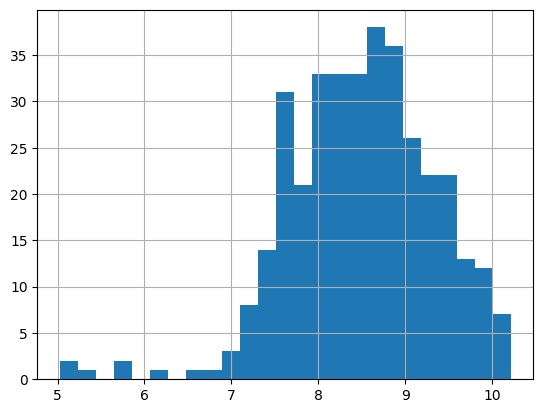

In [302]:
df['speed_mph'].hist(bins=25)

<Axes: >

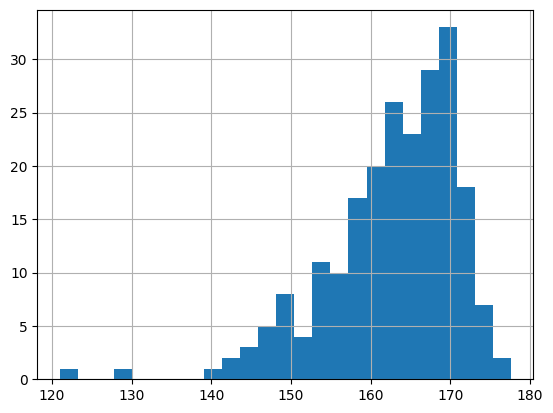

In [280]:
df['average_heartrate'].hist(bins=25)

In [281]:
df['pace'].max()

11.935731778496576

In [282]:
df.columns

Index(['has_heartrate', 'start_date', 'location_country',
       'display_hide_heartrate_option', 'resource_state', 'manual',
       'sport_type', 'visibility', 'elev_high', 'max_speed', 'average_watts',
       'distance', 'photo_count', 'gear_id', 'id', 'kilojoules',
       'device_watts', 'commute', 'start_latlng', 'timezone', 'upload_id_str',
       'location_city', 'end_latlng', 'weighted_average_watts', 'pr_count',
       'elapsed_time', 'kudos_count', 'name', 'map', 'average_speed',
       'average_heartrate', 'moving_time', 'external_id', 'type',
       'from_accepted_tag', 'achievement_count', 'upload_id', 'max_heartrate',
       'device_name', 'athlete', 'location_state', 'comment_count',
       'heartrate_opt_out', 'utc_offset', 'has_kudoed', 'trainer',
       'total_elevation_gain', 'workout_type', 'athlete_count',
       'start_date_local', 'total_photo_count', 'flagged', 'elev_low',
       'private', 'max_watts', 'date_str', 'time_mins', 'distance_miles',
       'pace', 'p

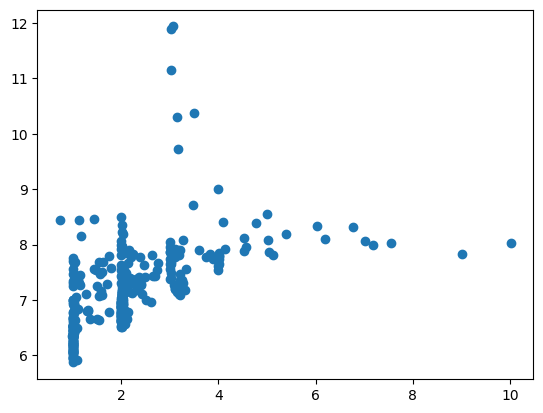

In [286]:
plt.scatter(df['distance_miles'], df['pace'])

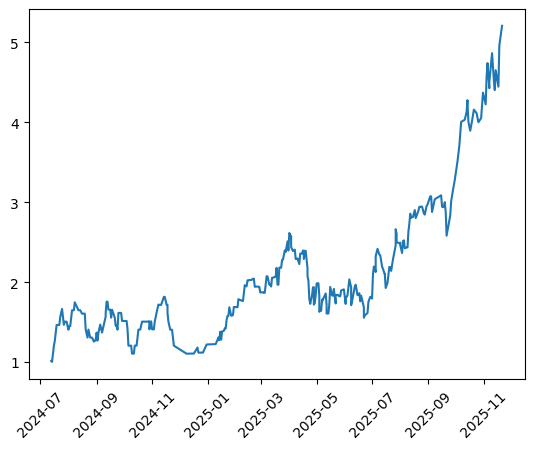

In [304]:
df['rolling_avg_distance'] = df['distance_miles'].rolling(window=10).mean()
plt.plot(df['date_str'], df['rolling_avg_distance'])
plt.xticks(rotation=45)
plt.show()

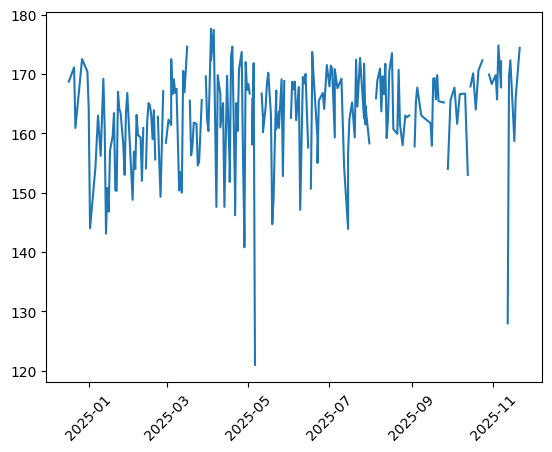

In [295]:
plt.plot(df['date_str'], df['average_heartrate'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
outdoor_runs['start']

In [335]:
import folium
import pandas as pd


# Convert to DataFrame

# Center map on first point
m = folium.Map(location=[outdoor_runs.start_lat.mean(), outdoor_runs.start_long.mean()], zoom_start=3)

# Add each point
for _, row in outdoor_runs.iterrows():
    folium.CircleMarker(location=[row.start_lat, row.start_long], radius=row['distance_miles']).add_to(m)

# Save to HTML
m


In [313]:
import folium

m = folium.Map(location=[df.lat.mean(), df.lon.mean()], zoom_start=5)

folium.PolyLine(df[['lat', 'lon']].values, weight=15).add_to(m)

m


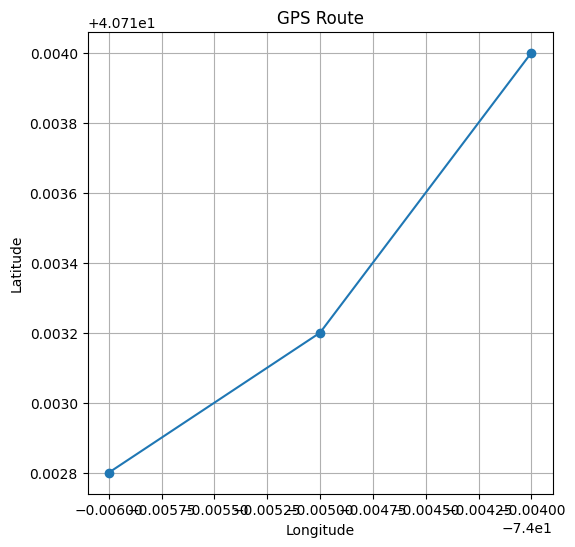

In [309]:
import matplotlib.pyplot as plt

lats = df["lat"]
lons = df["lon"]

plt.figure(figsize=(6, 6))
plt.plot(lons, lats, marker="o")
plt.title("GPS Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


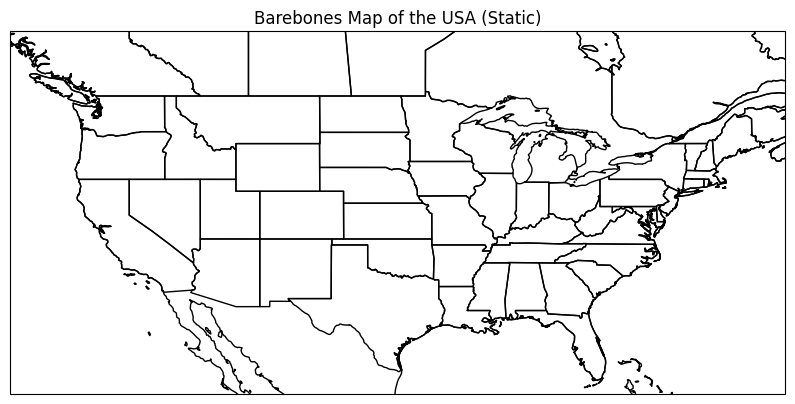

In [311]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -65, 24, 50])  # continental US bounds

# land & borders (simple)
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

plt.title("Barebones Map of the USA (Static)")
plt.show()


In [376]:
feature_cols = [
    'elev_high',
    'max_speed',
    'average_watts',
    'distance',
    'kilojoules',
    'weighted_average_watts',
    'average_speed',
    'average_heartrate',
    'max_heartrate',
    'total_elevation_gain',
    'elev_low',
    'max_watts',
    'time_mins',
    'distance_miles',
    'pace',
    'speed_mph'
]

In [417]:
matrix = outdoor_runs[feature_cols].dropna()
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Only include PCA with 2 components
])

# Fit the pipeline to the data
pca_features = pipe.fit_transform(matrix)

# Add PCA features to the matrix
matrix['pca_1'] = pca_features[:, 0]
matrix['pca_2'] = pca_features[:, 1]

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(matrix[['pca_1', 'pca_2']])
matrix['cluster'] = kmeans.labels_

In [418]:
matrix.groupby('cluster').agg({'distance_miles':'mean', 'pace':'mean', })

,distance_miles,pace
cluster,,
0,2.193490,7.554292
1,4.712376,8.522935
2,1.855958,7.101042


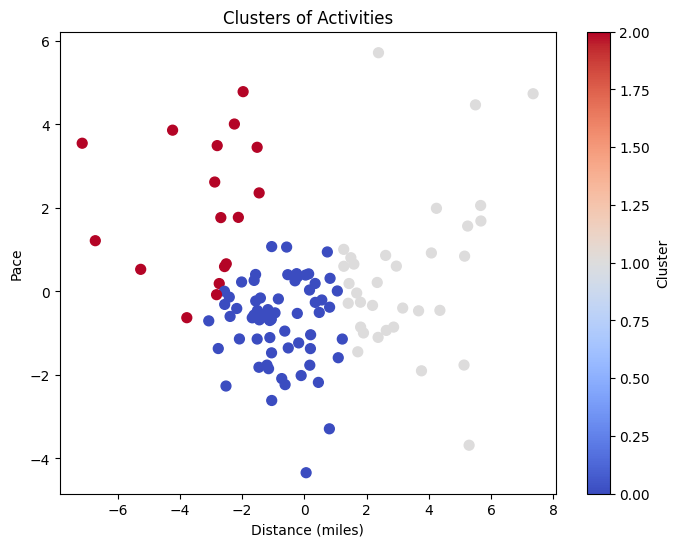

In [419]:
plt.figure(figsize=(8, 6))

plt.scatter(matrix['pca_1'], matrix['pca_2'], c=matrix['cluster'], cmap='coolwarm', s=50)

plt.xlabel('Distance (miles)')
plt.ylabel('Pace')
plt.title('Clusters of Activities')
plt.colorbar(label='Cluster')
plt.show()

,elev_high,max_speed,average_watts,distance,kilojoules,weighted_average_watts,average_speed,average_heartrate,max_heartrate,total_elevation_gain,elev_low,max_watts,time_mins,distance_miles,pace,speed_mph,cluster
270,6.2,6.90,293.7,1634.7,112.8,287.0,4.257,168.7,191.0,4.6,3.4,319.0,6.483333,1.015755,6.382772,9.400305,1
267,342.0,5.66,289.7,1628.6,110.1,283.0,4.286,172.5,180.0,10.2,334.2,324.0,6.400000,1.011965,6.324331,9.487170,2
212,7.0,8.90,264.1,3236.1,223.7,260.0,3.821,169.1,186.0,9.0,2.2,300.0,14.200000,2.010819,7.061800,8.496417,1
204,341.2,5.22,244.1,3256.8,214.3,243.0,3.709,166.9,178.0,6.6,316.0,290.0,14.683333,2.023681,7.255755,8.269298,2
203,361.0,6.73,258.5,3536.5,245.6,252.0,3.723,174.6,187.0,35.4,335.0,420.0,17.083333,2.197479,7.774062,7.717973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,14.2,6.34,240.5,4452.5,305.0,240.0,3.511,169.7,179.0,10.2,2.2,626.0,21.216667,2.766654,7.668709,7.824003,4
5,38.4,5.78,231.7,11297.9,786.7,234.0,3.328,172.3,185.0,110.6,7.4,305.0,56.633333,7.020187,8.067211,7.437515,3
4,7.0,7.90,233.6,6640.3,456.9,233.0,3.395,158.7,167.0,21.6,2.2,452.0,32.666667,4.126090,7.917100,7.578532,3
2,21.6,7.36,233.7,11545.7,803.3,234.0,3.358,166.0,173.0,36.2,0.0,275.0,57.350000,7.174163,7.993964,7.505663,3


In [372]:
outdoor_runs['total_elevation_gain']

392      6.1
391     12.1
389      7.3
390      7.8
388      8.6
       ...  
6       10.2
5      110.6
4       21.6
2       36.2
1       43.8
Name: total_elevation_gain, Length: 242, dtype: float64